In [206]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as stats

## Chargement des données, suppression des variables qualitatives

In [186]:
df = pd.read_csv('../dataset/data_cleaned.csv')
colonnes_object = df.select_dtypes(include=['object', 'bool']).columns.tolist()
df_quantitatifs = df.drop(columns=colonnes_object + ["Attrition"])

## Centrage des données

In [187]:
mean = df_quantitatifs.mean(axis=0)
df_centered = df_quantitatifs-mean

In [188]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(df_centered)
cls.components_

array([[ 5.31766734e-05, -6.57075934e-07, -1.81543064e-03,
         3.07158089e-05, -3.37706971e-06,  1.04193586e-03,
         5.73793100e-06, -4.48275171e-05, -1.67053282e-06,
         1.01290834e-05,  6.85559838e-08,  4.08313789e-02,
         9.99163854e-01,  7.55263696e-06, -3.68016945e-06,
        -5.19997843e-07, -5.14477971e-07, -4.08390029e-06,
         5.16476770e-05,  1.59326565e-07,  8.71624279e-07,
        -8.37848069e-06, -1.51553856e-06,  4.92333701e-06,
        -1.37329224e-05],
       [ 9.63953138e-04, -1.46288329e-06,  8.39357181e-04,
        -3.22781287e-05,  2.10332199e-05, -2.03249348e-03,
        -1.99588341e-06, -6.42381041e-05, -2.15777732e-06,
         2.23154351e-04, -1.68467447e-06,  9.99162140e-01,
        -4.08277778e-02,  7.88625524e-05, -2.09131657e-05,
        -1.26689862e-06,  6.01213850e-06,  1.36189643e-06,
         1.27633343e-03, -5.98676429e-06,  4.53559260e-06,
         6.72029850e-04,  2.80966276e-04,  2.36369005e-04,
         2.62841679e-04],
    

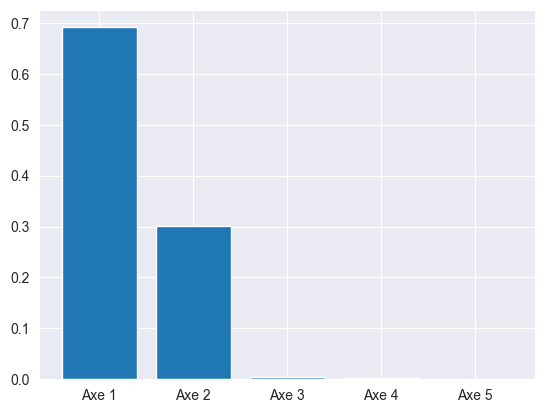

In [189]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

## Deux premiers axes factoriels de l'ACP

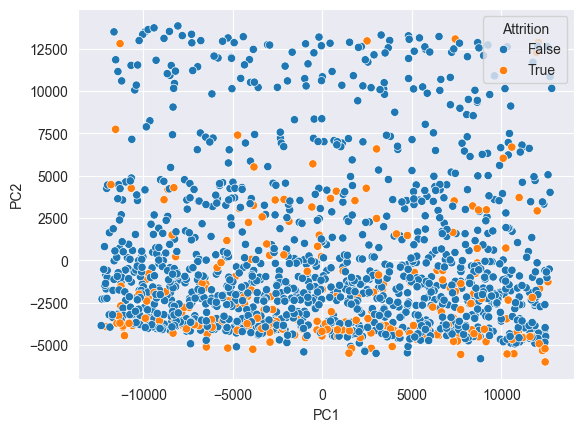

In [190]:
df_attrition = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()

## Suppression de l'effet de grandeur

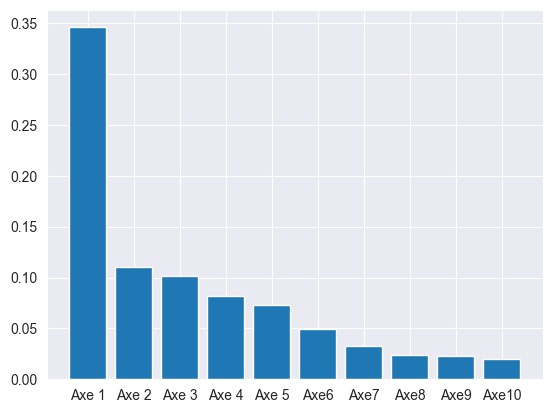

In [191]:
taille = df_quantitatifs.sum()
df2 = df_quantitatifs/taille 
cls = PCA(n_components=10)
pcs = cls.fit_transform(df2)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe6", "Axe7", "Axe8", "Axe9", "Axe10"], cls.explained_variance_ratio_)
plt.show()

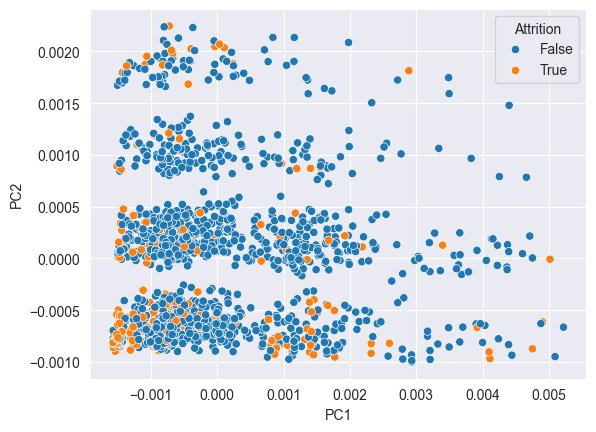

In [192]:
df_attrition = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, 11)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()

## Standard scaler

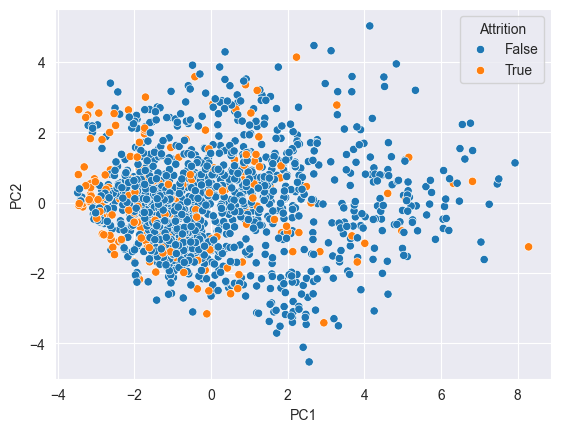

In [204]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_quantitatifs), columns = df_quantitatifs.columns)
pca = PCA(n_components=10)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 11)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()

## Min Max Scaler

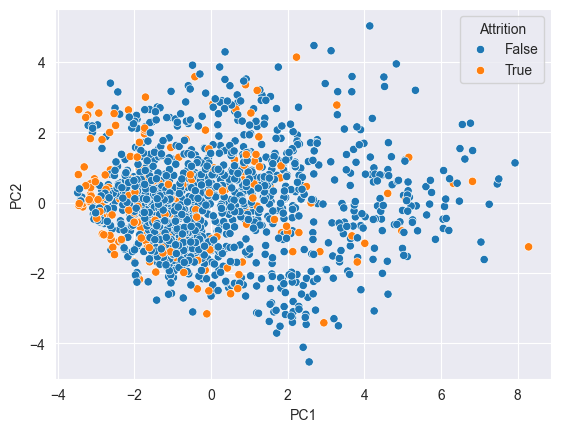

In [207]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_quantitatifs), columns = df_quantitatifs.columns)
pca = PCA(n_components=10)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 11)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()